# Introduction to Computer Vision

## Import resources

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## Read in and display the image

Image dimensions: (1024, 768, 3)


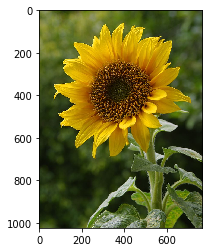

In [4]:
# Read in the image
image = cv2.cvtColor(cv2.imread('data/images/sunflower.jpg'), cv2.COLOR_BGR2RGB)

# Print out the image dimensions
print('Image dimensions:', image.shape)

plt.imshow(image)


## Split and Merge Image Channels

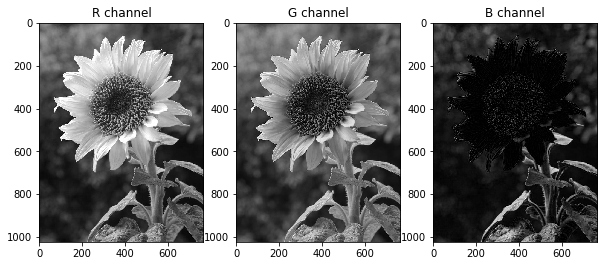

In [5]:
# Image split into channels:
r, g, b = cv2.split(image)
#or
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')


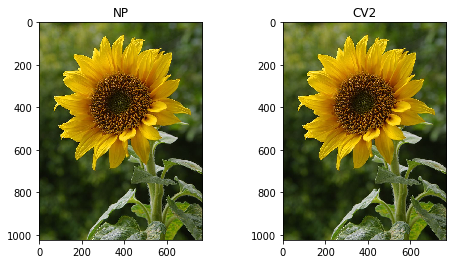

In [6]:
# Marge image into RGB:
image1 = np.stack([r,g,b], axis=2)
image2 = cv2.merge((r,g,b))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.set_title('NP')
ax1.imshow(image1)
ax2.set_title('CV2')
ax2.imshow(image2)


## Masking

Pizza image shape: (514, 816, 3)
Sky image shape: (514, 816, 3)


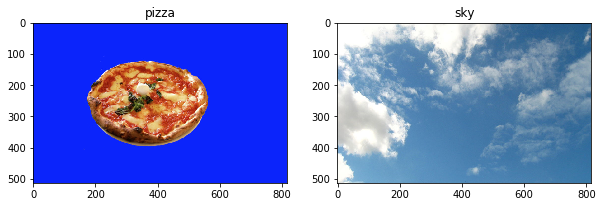

In [7]:
# Read in the images
pizza = cv2.cvtColor(cv2.imread('data/images/pizza_bluescreen.jpg'), cv2.COLOR_BGR2RGB)
sky = cv2.cvtColor(cv2.imread('data/images/sky.jpg'), cv2.COLOR_BGR2RGB)

# resize images to be the same size:
sky = cv2.resize(sky, (816, 514))

print("Pizza image shape:", pizza.shape)
print("Sky image shape:", sky.shape)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('pizza')
ax1.imshow(pizza)
ax2.set_title('sky')
ax2.imshow(sky)

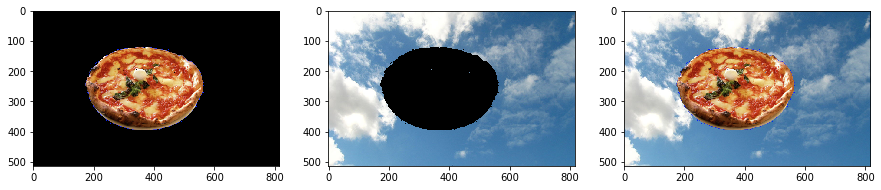

In [8]:
lower_blue = np.array([0,0,240]) 
upper_blue = np.array([250,250,255])

# Define the masked area
mask = cv2.inRange(pizza, lower_blue, upper_blue)

masked_image = np.copy(pizza)
masked_image[mask != 0] = [0, 0, 0]

crop_background = np.copy(sky)
crop_background[mask == 0] = [0, 0, 0]

complete_image = masked_image + crop_background

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,30))
ax1.imshow(masked_image)
ax2.imshow(crop_background)
ax3.imshow(complete_image)

## Fast Fourier Transform

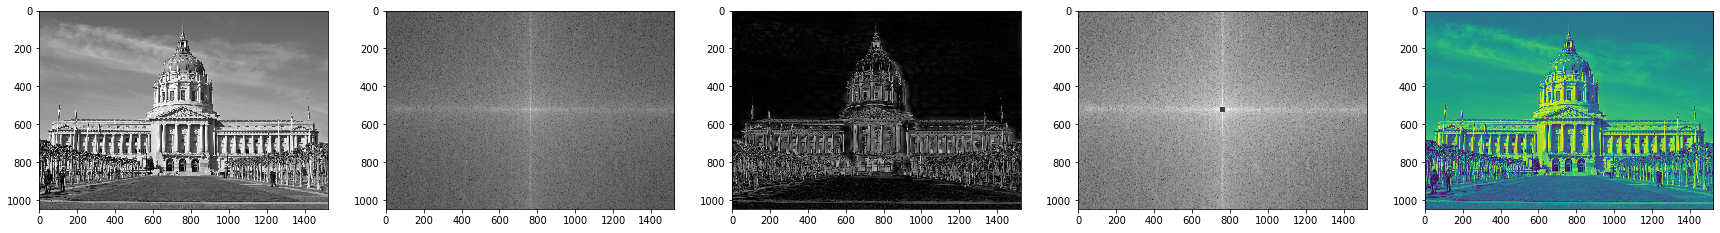

In [106]:
# Read in the images and convert to GRAY:
hall = cv2.cvtColor(cv2.imread('data/images/city_hall.jpg'), cv2.COLOR_BGR2GRAY)

# Normalise the image 
norm_hall = hall/255.0

#FFT:
f = np.fft.fft2(norm_hall)
fshift = np.fft.fftshift(f)
frequency_tx = 20*np.log(np.abs(fshift))

# Remove part of the fft image:
rows, cols = hall.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-15:crow+15, ccol-15:ccol+15] = 1
frequency_tx_altered = 20*np.log(np.abs(fshift))

# Reconstruct image from modified fft:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Get the image difference:
altered_image = np.abs(hall - img_back)

# Display the results:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30,15))
ax1.imshow(hall, cmap='gray')
ax2.imshow(frequency_tx, cmap='gray')
ax3.imshow(img_back, cmap='gray')
ax4.imshow(frequency_tx_altered, cmap='gray')
ax5.imshow(altered_image)

## Create and Apply Custom Filters

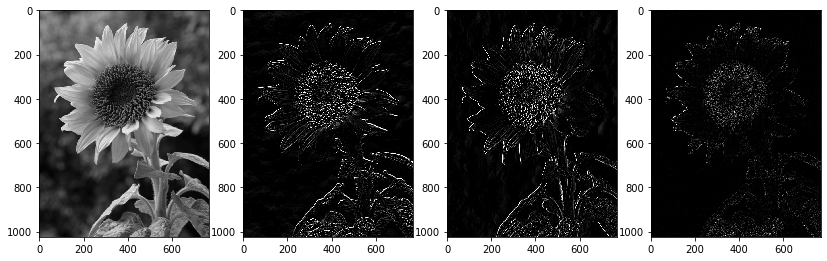

In [125]:
# Read in the image
sunflower = cv2.cvtColor(cv2.imread('data/images/sunflower.jpg'), cv2.COLOR_BGR2GRAY)

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1,-2,-1], 
                    [ 0, 0, 0], 
                    [ 1, 2, 1]])

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
gaussian_image = cv2.filter2D(sunflower, -1, gaussian)
sobel_y_image = cv2.filter2D(sunflower, -1, sobel_y)
sobel_x_image = cv2.filter2D(sunflower, -1, sobel_x)
laplacian_image = cv2.filter2D(sunflower, -1, laplacian)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,7))
ax1.imshow(gaussian_image, cmap='gray')
ax2.imshow(sobel_y_image, cmap='gray')
ax3.imshow(sobel_x_image, cmap='gray')
ax4.imshow(laplacian_image, cmap='gray')

## Canny Edge Detection:

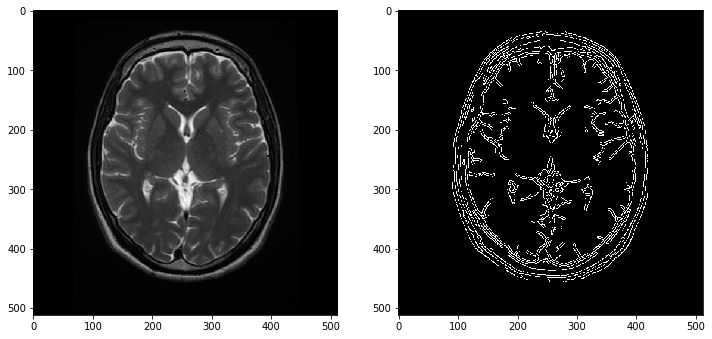

In [126]:
# Read in the image
brain = cv2.cvtColor(cv2.imread('data/images/brain_MR.jpg'), cv2.COLOR_BGR2GRAY)

# Try Canny using "wide" and "tight" thresholds
egdes = cv2.Canny(brain, 70, 150)
 
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(brain, cmap='gray')
ax2.imshow(egdes, cmap='gray')

## Hough Transform

In [150]:
# Read in the image
phone = cv2.cvtColor(cv2.imread('data/images/phone.jpg'), cv2.COLOR_BGR2RGB)
farm = cv2.cvtColor(cv2.imread('data/images/round_farms.jpg'), cv2.COLOR_BGR2RGB)

# Edges:
edges_phone = cv2.Canny(cv2.cvtColor(phone, cv2.COLOR_BGR2GRAY), 50, 100)
blur_farm = cv2.GaussianBlur(cv2.cvtColor(farm, cv2.COLOR_BGR2GRAY), (3, 3), 0)

### Hough Lines:

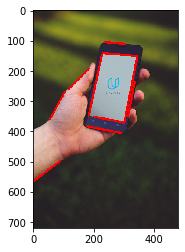

In [151]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(phone) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges_phone, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

### Hough Circles:

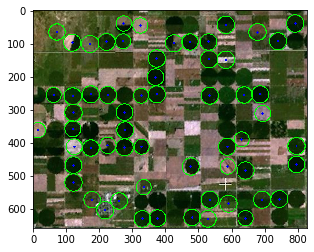

In [152]:
# Detect Circles:
circles_im = np.copy(farm)
circles = cv2.HoughCircles(blur_farm, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=22,
                           maxRadius=27)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)


## ORB

In [ ]:
### FAST

In [ ]:
### BRIEF